In [39]:

!pip install requests pandas matplotlib scikit-learn

In [46]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [47]:

API_KEY = '9e1f3ec720494590a8351728bd97ef24'
BASE_URL = 'https://api.twelvedata.com/time_series'

In [48]:
# Function to fetch historical data
def fetch_historical_data(symbol, interval, start_date, end_date):
    params = {
        'symbol': symbol,
        'interval': interval,
        'start_date': start_date,
        'end_date': end_date,
        'apikey': API_KEY,
        'format': 'JSON'
    }
    response = requests.get(BASE_URL, params=params)
    data = response.json()
    if 'values' in data:
        df = pd.DataFrame(data['values'])
        df['datetime'] = pd.to_datetime(df['datetime'])
        df = df.set_index('datetime')
        df = df.astype(float)
        return df
    else:
        print(f"Error for {symbol}: {data.get('message', 'Unknown error')}")
        return None

In [49]:
# Top 10 cryptocurrencies
top_10_cryptos = ['BTC/USD', 'ETH/USD', 'BNB/USD', 'XRP/USD', 'ADA/USD', 
                   'SOL/USD', 'DOGE/USD', 'DOT/USD', 'MATIC/USD', 'LTC/USD']

In [50]:
# Fetch and save data
interval = '1day'
start_date = '2023-01-01'
end_date = '2024-12-31'

crypto_data = {}

for crypto in top_10_cryptos:
    print(f"Fetching data for {crypto}...")
    data = fetch_historical_data(crypto, interval, start_date, end_date)
    if data is not None:
        crypto_data[crypto] = data
        filename = f"{crypto.replace('/', '_')}_historical_data.csv"
        data.to_csv(filename)
        print(f"Saved to {filename}")

Fetching data for BTC/USD...
Saved to BTC_USD_historical_data.csv
Fetching data for ETH/USD...
Saved to ETH_USD_historical_data.csv
Fetching data for BNB/USD...
Saved to BNB_USD_historical_data.csv
Fetching data for XRP/USD...
Saved to XRP_USD_historical_data.csv
Fetching data for ADA/USD...
Saved to ADA_USD_historical_data.csv
Fetching data for SOL/USD...
Saved to SOL_USD_historical_data.csv
Fetching data for DOGE/USD...
Error for DOGE/USD: You have run out of API credits for the current minute. 9 API credits were used, with the current limit being 8. Wait for the next minute or consider switching to a higher tier plan at https://twelvedata.com/pricing
Fetching data for DOT/USD...
Error for DOT/USD: You have run out of API credits for the current minute. 10 API credits were used, with the current limit being 8. Wait for the next minute or consider switching to a higher tier plan at https://twelvedata.com/pricing
Fetching data for MATIC/USD...
Error for MATIC/USD: You have run out of A

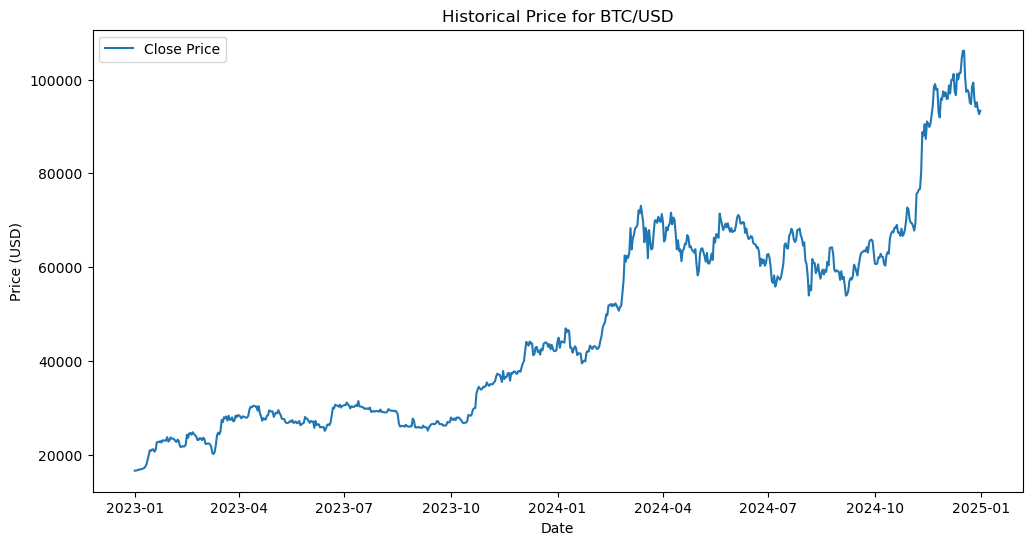

In [51]:
# Plot example for BTC
crypto = 'BTC/USD'
if crypto in crypto_data:
    plt.figure(figsize=(12, 6))
    plt.plot(crypto_data[crypto].index, crypto_data[crypto]['close'], label='Close Price')
    plt.title(f'Historical Price for {crypto}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()
else:
    print("No data for BTC")

In [52]:

!pip install tensorflow

In [53]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [54]:

def prepare_lstm_data(data, sequence_length=60):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data[['close']])
    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i, 0])
        y.append(scaled_data[i, 0])
    return np.array(X), np.array(y), scaler

In [55]:

crypto = 'BTC/USD'
btc_data = crypto_data[crypto]
X, y, scaler = prepare_lstm_data(btc_data)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [56]:

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0458
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0032
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0013
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0013
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0011
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0014
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0011
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.0992e-04
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.5641e-04
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0010


In [57]:

last_sequence = X[-1]
future_predictions = []
current_sequence = last_sequence
for _ in range(365):  # Predict 365 days into the future
    next_pred = model.predict(np.expand_dims(current_sequence, axis=0), verbose=0)
    future_predictions.append(next_pred[0][0])
    current_sequence = np.append(current_sequence[1:], next_pred)[..., np.newaxis]

# Inverse transform predictions
predicted_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

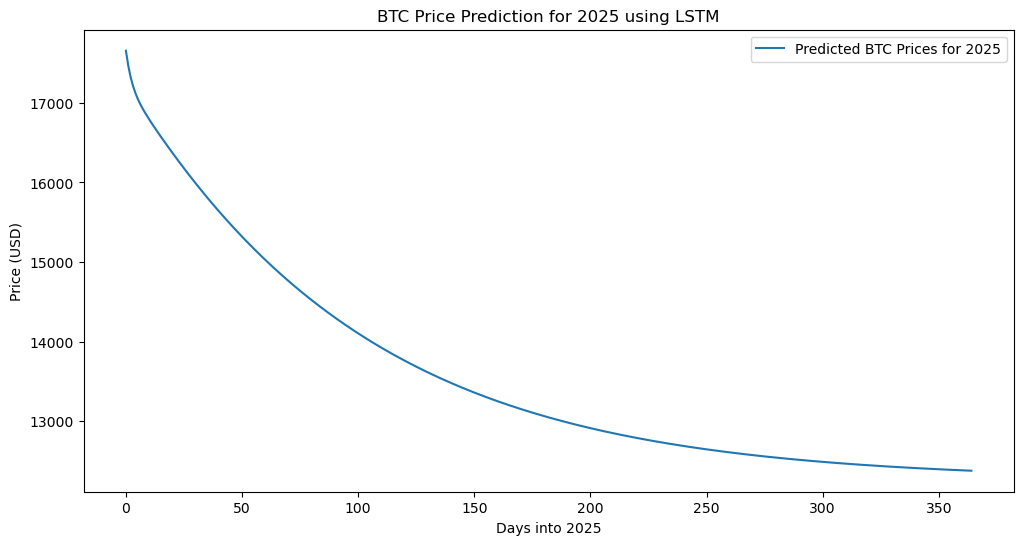

In [58]:
# Plot predicted prices for 2025
plt.figure(figsize=(12,6))
plt.plot(predicted_prices, label='Predicted BTC Prices for 2025')
plt.title('BTC Price Prediction for 2025 using LSTM')
plt.xlabel('Days into 2025')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [59]:

!pip install textblob

In [60]:

from textblob import TextBlob

In [61]:

def fetch_crypto_news():
    url = 'https://min-api.cryptocompare.com/data/v2/news/?categories=Cryptocurrency'
    response = requests.get(url)
    data = response.json()
    if 'Data' in data:
        news_items = data['Data']
        return [item['title'] for item in news_items]
    return []

news_titles = fetch_crypto_news()

# Analyze sentiment
sentiment_scores = [(title, TextBlob(title).sentiment.polarity) for title in news_titles]
df_sentiment = pd.DataFrame(sentiment_scores, columns=['Title', 'Sentiment'])
df_sentiment.head()

,Title,Sentiment
0,Here’s why Shiba Inu price is on the verge of ...,0.500000
1,"U.S. Stocks Add $4 Trillion in 10 Minutes, Sur...",0.000000
2,MicroStrategy Soars 23.12%: US-Listed Crypto S...,0.000000
3,"Crypto Stabilizes: Solana, XRP, and BTC Still ...",0.000000
4,Trump’s Bold Moves Challenge Wall Street’s Sta...,0.333333


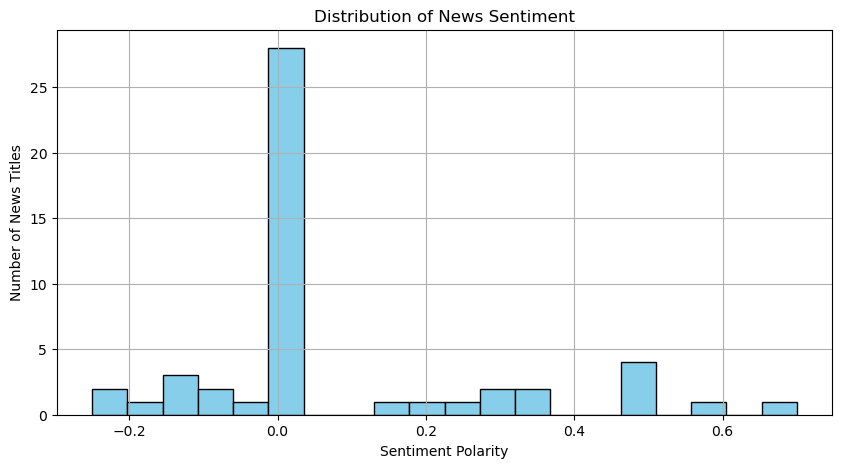

In [62]:

plt.figure(figsize=(10, 5))
plt.hist(df_sentiment['Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of News Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of News Titles')
plt.grid(True)
plt.show()